In [1]:
from glob import glob
import json
from tqdm import tqdm

In [2]:
data = []
import json

with open('ada-002-twitter.jsonl') as fopen:
    for x in fopen:
        data.append(json.loads(x))

In [3]:
len(data)

75114

In [4]:
data[0]

{'v': [0.024253619834780693,
  0.005073125474154949,
  -0.011396437883377075,
  0.0016680121188983321,
  0.008843425661325455,
  0.025398528203368187,
  0.0025398528669029474,
  0.013502015732228756,
  0.0034709128085523844,
  -0.025990720838308334,
  -0.0023440998047590256,
  0.007948555052280426,
  0.000432219123467803,
  -0.012995360419154167,
  -0.00419799517840147,
  0.0022799456492066383,
  0.048823077231645584,
  -0.0035959314554929733,
  -0.0057409885339438915,
  -0.0027750851586461067,
  -0.009396139532327652,
  0.023503508418798447,
  0.016423504799604416,
  0.011126660741865635,
  -0.024200981482863426,
  0.009290860034525394,
  0.006438461132347584,
  -0.02724090777337551,
  -0.005678479094058275,
  0.018858077004551888,
  0.018858077004551888,
  -0.013488855212926865,
  -0.002174666617065668,
  0.007376100867986679,
  -0.04642798379063606,
  -0.015581273473799229,
  -0.021108413115143776,
  0.00878420565277338,
  0.010508147068321705,
  -0.020608339458703995,
  0.014791681

In [5]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         124G   33G   91G  27% /
tmpfs            64M     0   64M   0% /dev
/dev/sdd        984G  575G  409G  59% /home/ubuntu
/dev/sdc        9.8G  290M  9.5G   3% /dev/shm
/dev/root       124G   33G   91G  27% /etc/hosts
tmpfs           842G   12K  842G   1% /run/secrets/kubernetes.io/serviceaccount
tmpfs           434G   12K  434G   1% /proc/driver/nvidia
tmpfs           174G   59M  174G   1% /run/nvidia-persistenced/socket
tmpfs           434G     0  434G   0% /proc/acpi
tmpfs           434G     0  434G   0% /proc/scsi
tmpfs           434G     0  434G   0% /sys/firmware


In [5]:
vectors, texts = [], []

for d in data:
    vectors.append(d['v'])
    texts.append(d['cleaned_text'])

In [6]:
data[0]['cleaned_text']

'Masam je muka adik jaga costa ni bila kita modify the drink so much'

In [7]:
texts[0]

'Masam je muka adik jaga costa ni bila kita modify the drink so much'

In [8]:
from scipy.spatial import KDTree
import numpy as np

In [9]:
concat = np.array(vectors)
concat.shape

(75114, 1536)

In [10]:
%%time

kd_tree = KDTree(concat, leafsize = 40)

CPU times: user 875 ms, sys: 8.73 ms, total: 884 ms
Wall time: 884 ms


In [11]:
concat[0]

array([ 2.42536198e-02,  5.07312547e-03, -1.13964379e-02, ...,
       -1.65682621e-02, -1.36122294e-03,  2.89157051e-05])

In [12]:
%%time

dist, ind = kd_tree.query(concat, k=len(concat), workers = 1000)

CPU times: user 1d 10h 12min 7s, sys: 2h 24min 21s, total: 1d 12h 36min 29s
Wall time: 34min 8s


In [45]:
len(ind)

75114

In [31]:
ind[0]

array([    0, 36437, 35594, ..., 74807, 60717, 72347])

In [32]:
dist[0]

array([0.        , 0.53149044, 0.54520009, ..., 0.80973031, 0.81134274,
       0.81888444])

In [33]:
dist.shape

(75114, 75114)

In [34]:
ind.shape

(75114, 75114)

In [38]:
len(data)

75114

In [59]:
dist[1][dist[1] > 0.8].shape

(54,)

In [129]:
dist[dist > 0.8].shape

(2897130,)

/tmp/ipykernel_103462/196446839.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dist[4:1000])


<Axes: ylabel='Density'>

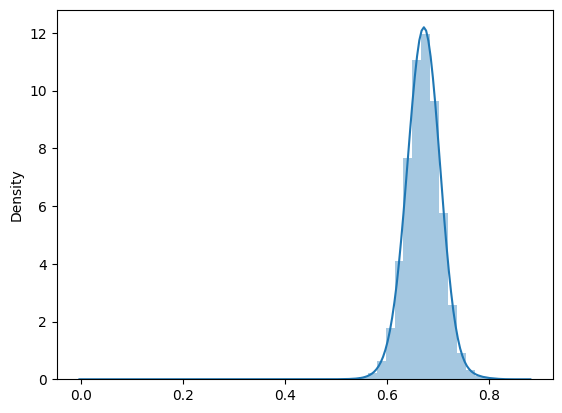

In [48]:
import seaborn as sns

sns.distplot(dist[4:1000])

In [137]:
texts[6]

'Selamat Tidur mutual ku semua.'

In [149]:
index = [x for x in ind[6][dist[6] <= 0.45]]
dist_index = [x for x in dist[6][dist[6] <= 0.45]]

index

[6, 26079, 57006, 11294]

In [151]:
dist_index

[0.0, 0.4228561192402692, 0.4312971327419234, 0.44546544033664737]

In [150]:
[texts[x] for x in index]

['Selamat Tidur mutual ku semua.',
 'selamat tidur ',
 'selamat tidur katanya ',
 'Selamat tidur!!']

In [168]:
index = [x for x in ind[19999][dist[19999] <= 0.45]]
dist_index = [x for x in dist[19999][dist[19999] <= 0.45]]

index

[19999,
 15878,
 70719,
 55242,
 53817,
 36143,
 13144,
 51168,
 66859,
 18772,
 14153,
 48637,
 32943,
 72073,
 18033,
 6935,
 30800,
 33046,
 57328,
 19624,
 29593,
 60933,
 72305,
 23852,
 54256,
 69253,
 11579,
 48818,
 10067,
 48103,
 55292,
 23701,
 21956,
 14648,
 26814,
 31715,
 18075,
 22994,
 24785,
 51147,
 73162,
 53684,
 66942,
 58216,
 61528,
 28207,
 13024,
 10566,
 32473,
 18241,
 35426,
 20749,
 71586,
 10563,
 58631,
 37403]

In [169]:
dist_index

[0.0,
 0.3080742603919012,
 0.32698305233766917,
 0.343375814367309,
 0.3478379244086293,
 0.3541855996214967,
 0.36828451566166887,
 0.3705551313751507,
 0.3727413449899139,
 0.3825061356178318,
 0.38687632031464964,
 0.3932988692252613,
 0.3957814740770134,
 0.3980093427396321,
 0.39966789976640127,
 0.40032319047447235,
 0.4011360471311762,
 0.4028114294293432,
 0.4037587787936547,
 0.40664563951617966,
 0.4079225147773059,
 0.4082379514034078,
 0.4086083675675115,
 0.4129676709079909,
 0.4158134402254247,
 0.41950734092702097,
 0.42323132012086645,
 0.4254158779269234,
 0.42794656898867695,
 0.42816112744322227,
 0.4283752273155668,
 0.43014023345947455,
 0.43040276051448545,
 0.4322336038808079,
 0.4331212241941449,
 0.4334724589729274,
 0.4337483644400949,
 0.43434192469725624,
 0.4344866490408653,
 0.4351264838345822,
 0.4365996783732404,
 0.4381702998386365,
 0.4386089589861381,
 0.4386174024120546,
 0.43881128305787503,
 0.43954967284575,
 0.44230523737320376,
 0.4445176223383

In [170]:
[texts[x] for x in index]

['selamat hari raya nia! maaf zahir &amp; batin',
 'Selamat hari raya maaf zahir dan batin ',
 'Selamat hari raya Aidilfitri maaf zahir dan batin',
 'Selamat Hari Raya Maaf Zahir Dan Batin..',
 'Selamat hari raya Maaf zahir dan batin Terengganu ',
 'Selamat hari raya.. maaf zahir dan batin semua.. Temerloh ',
 'Selamat hari raya Aidilfitri maaf zahir dan batin. Johor Bahru ',
 'Selamat Hari Raya 2019.. Maaf zahir &amp; batin.. ',
 'Selamat Hari Raya Aidilfitri Maaf Zahir &amp; Batin to all of you Terengganu ',
 'Selamat hari raya , mohon ampun zahir dan batin ',
 'Selamat hari raya aidilfitri Yana Maaf zahir dan batin',
 'Selamat Hari Raya Aidilfitri juga, Datin! Maaf zahir dan batin.',
 'Selamat Hari Raya Aidilfitri 1 Syawal 1440Hijrah.. Maaf Zahir &amp; Batin..',
 'Selamat Hari Raya jugak aten. Maaf zahir batin',
 'Selamat Hari Raya Maaf Zahir Batin #salamperantauan Kota Bharu ',
 'Selamat Hari Raya Dari Keluarga Kecik Kami. Maaf Zahir dan Batin Jitra ',
 'Selamat Hari Raya Aidilfitr

In [123]:
def construct_json(index):
    result = {
        'positive': [],
        'negative': []
    }
    
    result['positive'] = [x for x in ind[index][dist[index] <= 0.45] if x != index]
    result['negative'] = [x for x in ind[index][dist[index] > 0.8]]
    
    return result


result_json = {int(index): construct_json(index) for index in range(len(data))}

print(result_json)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [124]:
len(result_json)

75114

In [125]:
# Convert int64 to regular integers
def convert_int64(obj):
    if isinstance(obj, np.int64):
        return int(obj)
    raise TypeError

json_result = {int(key): value for key, value in result_json.items()}

with open('twitter-pair-mining022.json', 'w') as json_file:
    json.dump(json_result, json_file, indent=4, default = convert_int64)

In [78]:
data[6]['cleaned_text']

'Selamat Tidur mutual ku semua.'

In [79]:
data[57006]['cleaned_text']

'selamat tidur katanya '